# Data preparation

## Read data

In [641]:
# read the csv data into a Pandas DataFrame
import pandas as pd
df_audio_features = pd.read_csv('csv/df_audio_features_1000.csv',
                                index_col=["name", "artist"])

In [642]:
df_audio_features.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.697,0.550,2,-11.496,1,0.1790,0.856,0.000034,0.0907,0.844,84.802,122893,4
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.591,127.150,223760,4
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.224,114.278,157293,4
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.794,88.385,307053,4
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.404,76.118,185067,4


In [643]:
# how many songs ?
df_audio_features.shape[0]

1387

## Scale features

In [644]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler

In [645]:
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

In [646]:
# 3. fit the transformer to the data
my_min_max.fit(df_audio_features)

MinMaxScaler()

In [647]:
# 4. use the transformer to transform the data
# in reallity the real limits of properties should be used, not min/max values!
scaled_audio_features = my_min_max.transform(df_audio_features)

In [648]:
# 5. reconvert the transformed data back to a DataFrame
audio_features_norm = pd.DataFrame(scaled_audio_features,
                                   index=df_audio_features.index,
                                   columns=df_audio_features.columns)

## Drop irrelevant columns

In [649]:
audio_features_norm.drop(['key','duration_ms','mode','time_signature'],axis=1,inplace=True)
audio_features_norm.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.723440,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.698907,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.689059,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.856565,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.676903,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742


# Choosing best number of clusters

## Elbow method

In [650]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [651]:
# calculating inertia for different number of clusters
# to find 'elbow' point ('Elbow method')
inertia_list = []
max_num_clusters = 30
for i in range(1,max_num_clusters+1):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(scaled_audio_features)
    inertia_list.append(round(myKMeans.inertia_))

C:\Users\vital\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


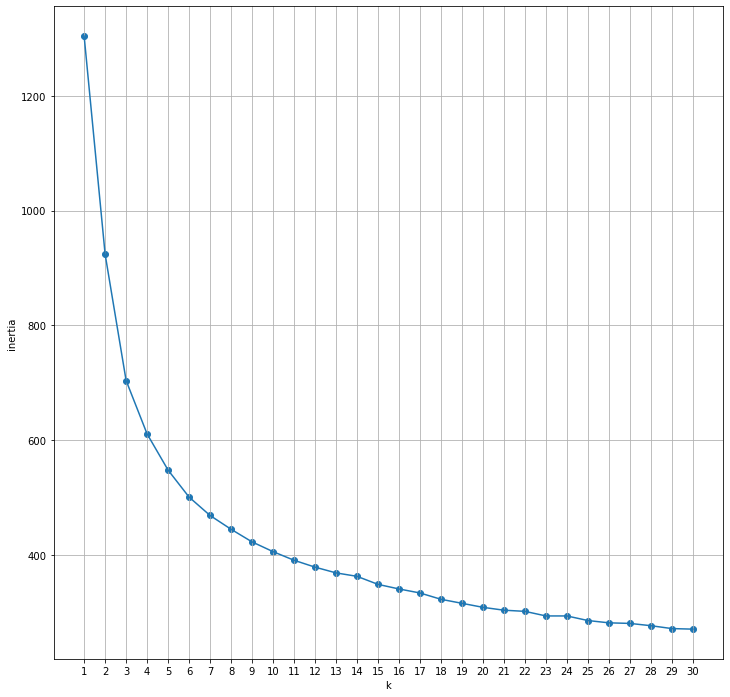

In [652]:
# Inertia: plot to find optimal k ('elbow')
x = range(1,max_num_clusters+1)
y = inertia_list
plt.figure(figsize=(12, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(1, len(x)+1, 1))
plt.grid()
plt.plot(x,y)
plt.scatter(x,y)
# according to the plot the optimal number
# of cluster is between 4 and 7

## Silhouette coefficient

In [653]:
# silhouette coefficient
from sklearn.metrics import silhouette_score

In [654]:
silhouette_list = []
data = audio_features_norm
max_num_clusters = 30
# create list of silhouette coefficient for different k
for i in range(2,max_num_clusters+1):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(data)
    silhouette_list.append(silhouette_score(data, myKMeans.labels_))

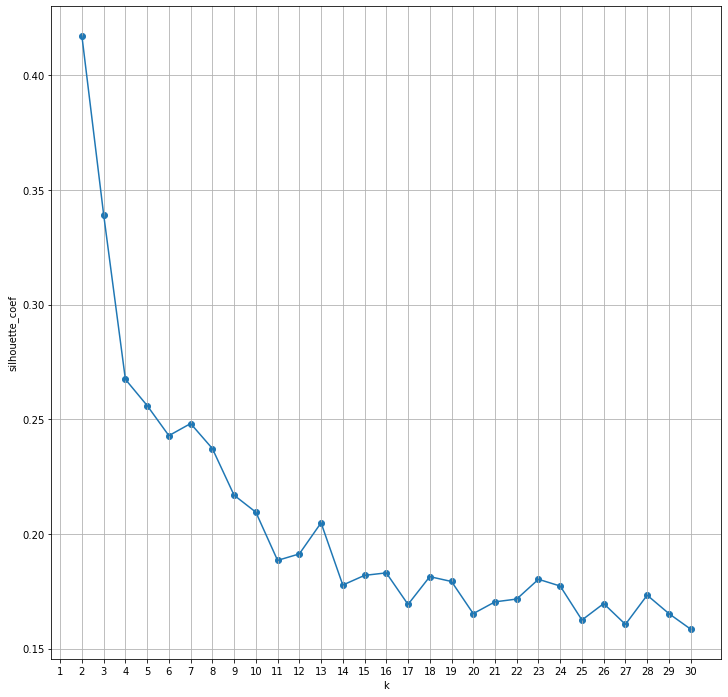

In [655]:
# silhouette coefficient
x = range(2,max_num_clusters+1)
y = silhouette_list
plt.figure(figsize=(12, 12))
plt.xlabel('k')
plt.ylabel('silhouette_coef')
plt.grid()
plt.xticks(np.arange(0, max_num_clusters+1, 1))

plt.plot(x,y)
plt.scatter(x,y)
#

# Distance between centroids and destribution

In [656]:
from sklearn.cluster import KMeans
import seaborn as sns
import distmatrix

3 clusters


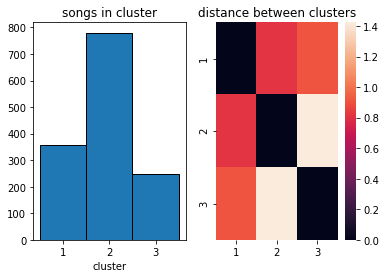

4 clusters


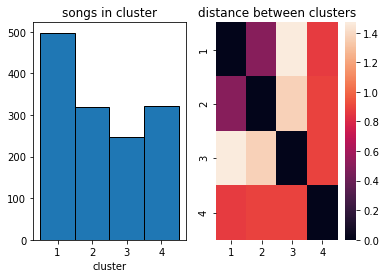

5 clusters


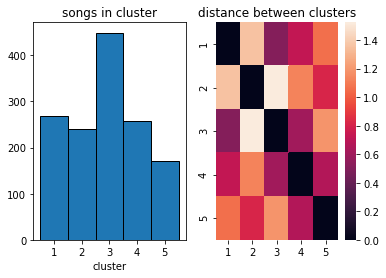

6 clusters


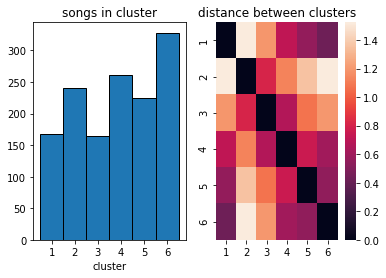

7 clusters


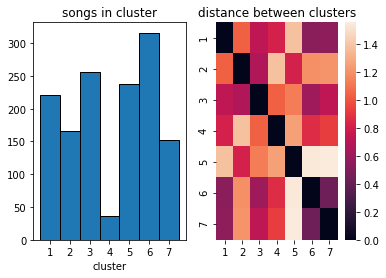

In [690]:
for number_clusters in range(3,8):
    print(number_clusters,'clusters')
    # cluster with KMeans
    my_kmeans = KMeans(n_clusters= number_clusters,random_state =42)
    data = audio_features_norm.copy()
    my_kmeans.fit(data)
    clusters = my_kmeans.predict(data)
    data["cluster"] = clusters

    # plot histogram clustering
    plt.subplot(1, 2, 1) 
 
    plt.title("songs in cluster")
    plt.xlabel("cluster")
    n, bins, patches = plt.hist(data['cluster'], bins=number_clusters, edgecolor='black')
    ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
    ticklabels = [i for i in range(1,number_clusters+1)]
    plt.xticks(ticks, ticklabels)

    # plot distance between centroids
    plt.subplot(1, 2, 2) 
    # heatmap - distance betwen centroids
    centroids = my_kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids,index=range(1,number_clusters+1))
    columns = centroids_df.columns
    # get distance matrix and plot it

    centr_dist_matrix = distmatrix.get_distance_matrix(centroids_df,
                                   columns,
                                   'euclid',
                                   'graph')
    plt.title('distance between clusters')
    
    
    
    plt.show()

# 5 Clusters

### General overview

In [705]:
from sklearn.cluster import KMeans
number_clusters = 5
my_kmeans = KMeans(n_clusters= number_clusters,random_state=42)
data = audio_features_norm.copy()
my_kmeans.fit(data)
clusters = my_kmeans.predict(data)
data["cluster"] = clusters

([<matplotlib.axis.XTick at 0x14ecdd45f40>,
 [Text(0.4, 0, '1'),
  Text(1.2000000000000002, 0, '2'),
  Text(2.0, 0, '3'),
  Text(2.8000000000000003, 0, '4'),
  Text(3.6, 0, '5')])

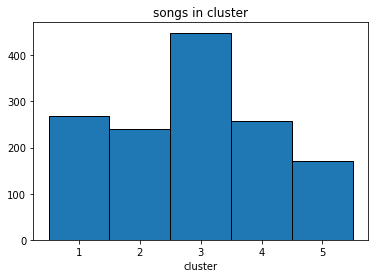

In [706]:
number_clusters=5
plt.title("songs in cluster")
plt.xlabel("cluster")
n, bins, patches = plt.hist(data['cluster'], bins=number_clusters, edgecolor='black')
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = [i for i in range(1,number_clusters+1)]
plt.xticks(ticks, ticklabels)

Text(0.5, 1.0, 'distance between clusters')

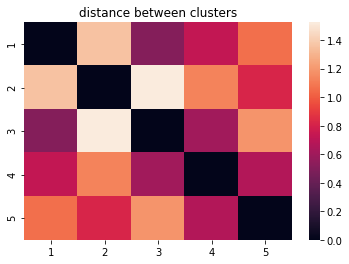

In [707]:
# heatmap
number_clusters = 5
centroids = my_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids,index=range(1,number_clusters+1))
# exclude column 'clusters'
columns = centroids_df.columns
# get distance matrix and plot it
import seaborn as sns
import distmatrix
centr_dist_matrix = distmatrix.get_distance_matrix(centroids_df,
                               columns,
                               'euclid',
                               'graph')
plt.title('distance between clusters')
#sns.heatmap(centr_dist_matrix)



1 cluster


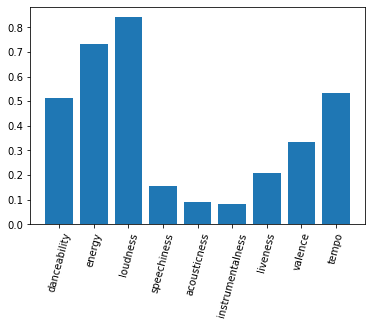

2 cluster


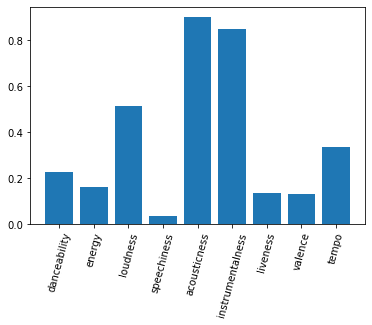

3 cluster


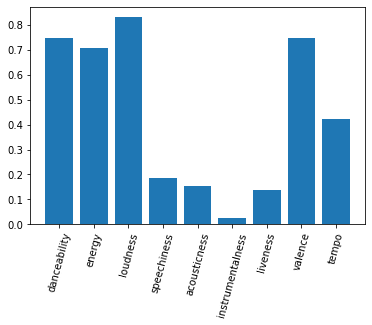

4 cluster


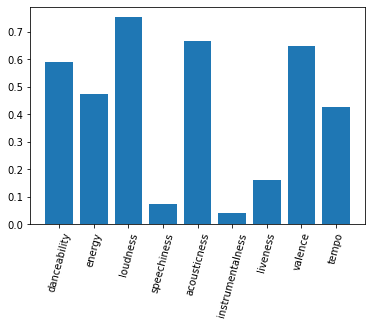

5 cluster


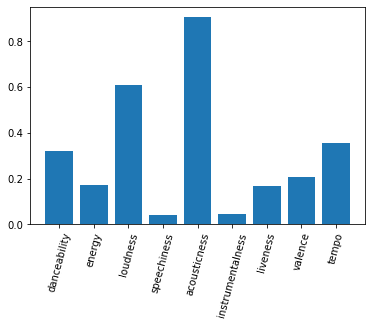

In [708]:
avg_properties = data.groupby(by="cluster").mean()
for i in avg_properties.index:
    print(i+1,'cluster')
    plt.xticks(rotation = 75)
    plt.bar(avg_properties.columns,avg_properties.iloc[i,:])
    plt.show()

In [709]:
#print top 3 highest features in cluster 
prop = list(avg_properties.columns)
for clust in range(number_clusters):
    avg_val = avg_properties.loc[clust,:].values
    dct = {value:key for key,value in zip(prop,avg_val)}
    avg_val.sort()
    print(clust+1,dct[avg_val[-1]],dct[avg_val[-2]],dct[avg_val[-3]])

1 loudness energy tempo
2 acousticness instrumentalness loudness
3 loudness valence danceability
4 loudness acousticness valence
5 acousticness loudness tempo


### Cluster 0

In [663]:
# get random songs from cluster 0
import distmatrix as dm
current_cluster = 0
dm.get_random_song_cluster(df = data,
                        cluster = current_cluster,
                        num_songs = 10)

[('Perfect', 'Ed Sheeran'),
 ('Never Really Over', 'Katy Perry'),
 ('Congratulations', 'Post Malone'),
 ('Break Stuff', 'Limp Bizkit'),
 ('Pacman - Ram Trilogy Remix', 'Ed Rush'),
 ('Bottoms Up (feat. Nicki Minaj)', 'Trey Songz'),
 ('Need To Know', 'Wilkinson'),
 ('Hide U', 'Kosheen'),
 ('thank u, next', 'Ariana Grande'),
 ('The Motto', 'Drake')]

In [664]:
# top 10 closest songs to centroid
current_cluster = 0
songs_cluster = data[data['cluster'] == current_cluster]
distances_centroid = dm.distance_to_centroid(songs_cluster[songs_cluster.columns[0:-1]],centroids[current_cluster])
song_dist = pd.DataFrame({'distances_centroid':distances_centroid}, index=songs_cluster.index)
song_dist.sort_values(by='distances_centroid',ascending=True).head(10)

,,distances_centroid
name,artist,
Titanium (feat. Sia),David Guetta,0.182227
Mercy,Shawn Mendes,0.198059
Take What You Want (feat. Ozzy Osbourne & Travis Scott),Post Malone,0.207511
A Great Work,Brian Courtney Wilson,0.213855
Never Forget You,Zara Larsson,0.214577
Just Like God,Evvie McKinney,0.217945
Wildest Dreams,Taylor Swift,0.223004
Nemo,Nightwish,0.224035
Castle on the Hill,Ed Sheeran,0.232817


In [665]:
song_dist.sort_values(by='distances_centroid',ascending=False).head(10)

,,distances_centroid
name,artist,
"The Theme From ""A Summer Place""",Percy Faith,1.167964
Pacman - Ram Trilogy Remix,Ed Rush,1.083774
Red River Rock,Johnny & The Hurricanes,1.020873
Pulp Fiction,Alex Reece,0.972277
My Girlfriend's Girlfriend,Type O Negative,0.936935
Got It,Boys Noize,0.908856
I Refuse - Shock One Remix,Netsky,0.894217
Valley of the Shadows - Chase & Status Remix,Origin Unknown,0.890819
Valley of the Shadows,Origin Unknown,0.890010


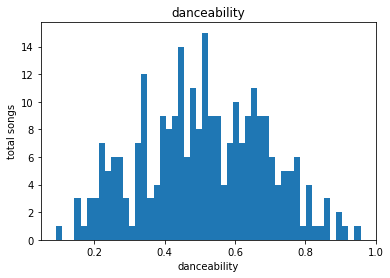

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


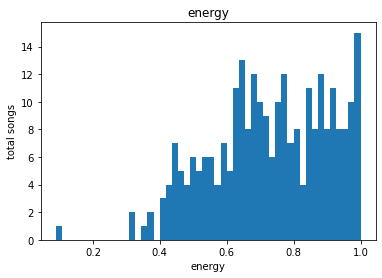

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


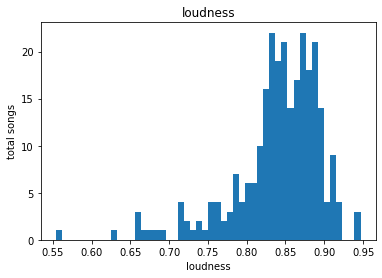

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


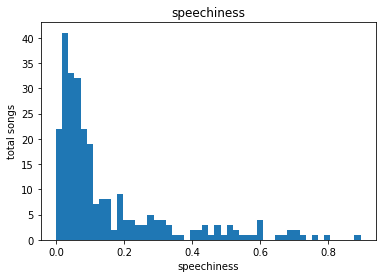

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


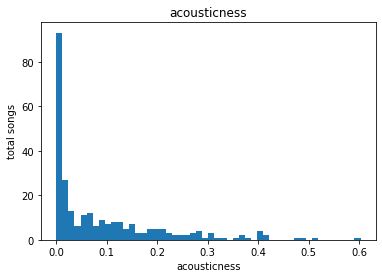

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


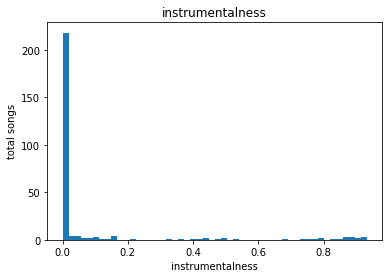

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


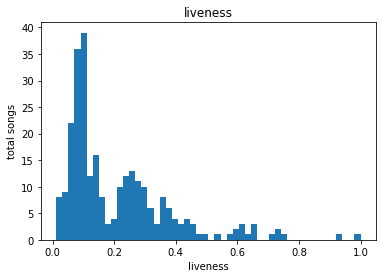

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


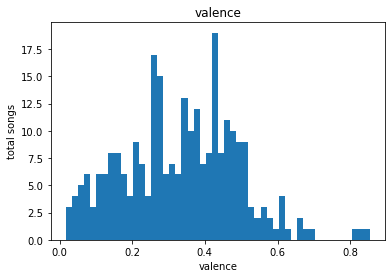

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


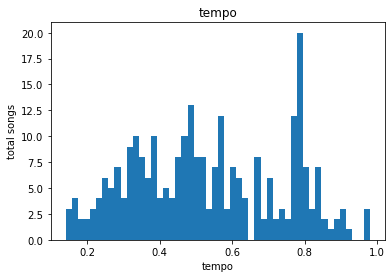

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [666]:
# histogram for every property to check value distribution
current_cluster = 0
for item in data.columns[0:-1]:
    y = data[data['cluster'] == current_cluster][item]
    plt.xlabel(item)
    plt.ylabel("total songs")
    plt.title(item)
    plt.hist(y, bins = 50)
    plt.show()
    print(dm.description(item))

### Cluster 1

In [667]:
dm.get_random_song_cluster(df = data,
                        cluster = 1,
                        num_songs = 10)

[('My Favorite Things', 'John Coltrane'),
 ('Dissolving Clouds', 'Biosphere'),
 ('Tod und Verklärung Op.24, TrV 158', 'Richard Strauss'),
 ('Symphony No. 15 in A Major, Op. 141: I. Allegretto', 'Dmitri Shostakovich'),
 ('Dolphin Dance', 'Ahmad Jamal Trio'),
 ('dlp 1.3', 'William Basinski'),
 ('Introspection', 'Laraaji'),
 ('Skating In Central Park', 'Bill Evans'),
 ('Du cristal', 'Kaija Saariaho'),
 ('Symphony No. 3 in A Minor, Op. 56, MWV N 18 "Scottish": 4. Allegro vivacissimo - Allegro maestoso assai',
  'Felix Mendelssohn')]

In [668]:
# top 10 closest songs to centroid
current_cluster = 1
songs_cluster = data[data['cluster'] == current_cluster]
columns = songs_cluster.columns[0:-1]
distances_centroid = dm.distance_to_centroid(songs_cluster[columns],centroids[current_cluster])
song_dist = pd.DataFrame({'distances_centroid':distances_centroid}, index=songs_cluster.index)
song_dist.sort_values(by='distances_centroid',ascending=True).head(10)


,,distances_centroid
name,artist,
"Symphony No. 3 in G Minor, Op. 36: I. Adagio - Allegro",Louise Farrenc,0.150613
Symphony No. 1 in B flat minor: Allegro Assai - Allegro Assai,William Walton,0.162948
Sinfonietta: Andante con moto. Allegretto,Leoš Janáček,0.173926
"Symphony No.1 in C minor, Op.68: 1. Un poco sostenuto - Allegro - Meno allegro",Johannes Brahms,0.174678
"Symphony No. 6 in A Major, WAB 106 (ed. L. Nowak): I. Maestoso",Anton Bruckner,0.175816
The Things We Did Last Summer,Freddie Hubbard,0.184311
"Symphony No. 6 in A Minor, ""Tragic"": I. Allegro energico, ma non troppo. Heftig, aber markig",Gustav Mahler,0.193048
An American in Paris,George Gershwin,0.195738
"Symphony ""Mathis der Maler"": I. Engelkonzert (Angelic Concert)",Paul Hindemith,0.201945


In [669]:
song_dist.sort_values(by='distances_centroid',ascending=False).head(10)

,,distances_centroid
name,artist,
Rebel Rouser,Duane Eddy,1.234985
Besame Mucho,Dave Brubeck,0.965838
Take Five,King Tubby,0.874512
Blue Bossa - Remastered,Joe Henderson,0.796128
"Köln, January 24, 1975, Pt. II C - Live",Keith Jarrett,0.788615
Jonchaies,Iannis Xenakis,0.785834
Body and Soul,Coleman Hawkins,0.767400
EXPO,Magnus Lindberg,0.741275
Amériques,Edgard Varèse,0.731996


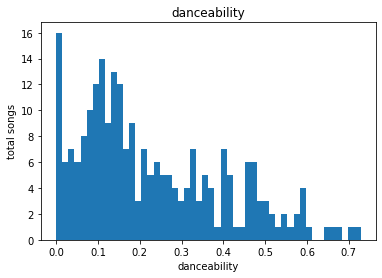

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


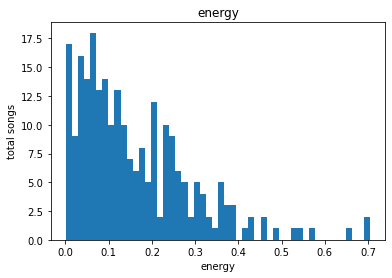

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


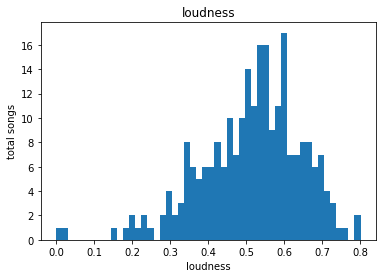

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


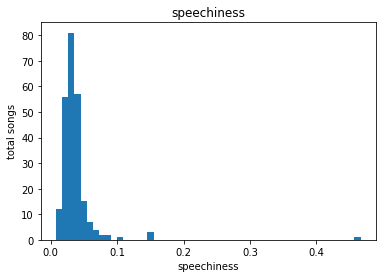

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


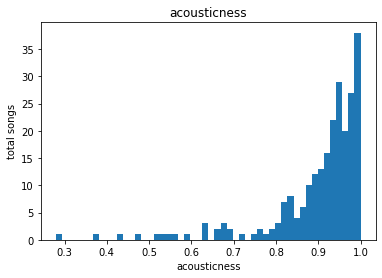

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


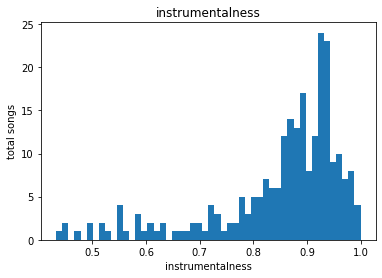

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


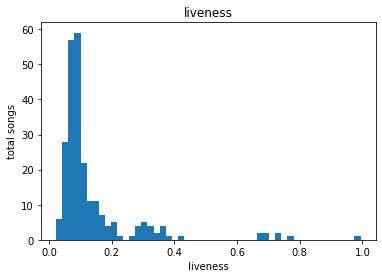

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


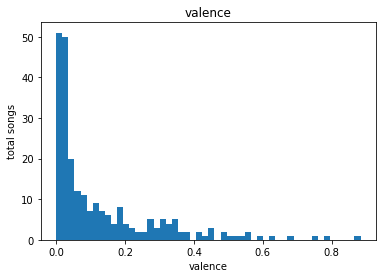

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


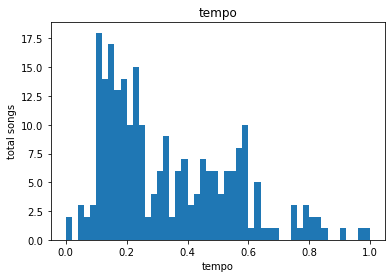

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [670]:
# histogram for every property to check value distribution
current_cluster = 1
for item in data.columns[0:-1]:
    y = data[data['cluster']==current_cluster][item]
    plt.xlabel(item)
    plt.ylabel("total songs")
    plt.title(item)
    plt.hist(y, bins = 50)
    plt.show()
    print(dm.description(item))

### Cluster 2

In [671]:
dm.get_random_song_cluster(df = data,
                        cluster = 2,
                        num_songs = 10)

[('Dragula', 'Rob Zombie'),
 ("I'm A Man", 'Bo Diddley'),
 ('A Mí', 'Rels B'),
 ('Escápate Conmigo (feat. Ozuna)', 'Wisin'),
 ('Dear Future Husband', 'Meghan Trainor'),
 ('Increase My Faith', 'Brian Courtney Wilson'),
 ("I'm Better (feat. Lamb)", 'Missy Elliott'),
 ('Meant to Be (feat. Florida Georgia Line)', 'Bebe Rexha'),
 ('Wake Me Up', 'Avicii'),
 ('Mayores', 'Becky G')]

In [672]:
# top 10 closest songs to centroid
current_cluster = 2
songs_cluster = data[data['cluster'] == current_cluster]
columns = songs_cluster.columns[0:-1]
distances_centroid = dm.distance_to_centroid(songs_cluster[columns],centroids[current_cluster])
song_dist = pd.DataFrame({'distances_centroid':distances_centroid}, index=songs_cluster.index)
song_dist.sort_values(by='distances_centroid',ascending=True).head(10)

,,distances_centroid
name,artist,
Starships,Nicki Minaj,0.177734
Classic,MKTO,0.178444
Picky,Joey Montana,0.192969
Shout Out to My Ex,Little Mix,0.196289
No Promises (feat. Demi Lovato),Cheat Codes,0.196642
Guerrera,DELLAFUENTE,0.202929
Have You Ever Seen The Rain,Creedence Clearwater Revival,0.204937
Original Nuttah,SHY FX,0.205017
Ain't No Stoppin' Us Now,McFadden & Whitehead,0.206795


In [673]:
song_dist.sort_values(by='distances_centroid',ascending=False).head(10)

,,distances_centroid
name,artist,
Casino Royale,DJ Zinc,1.061899
Warhead - Steppa Mix,Krust,1.048154
Garden - Calibre Remix,Totally Enormous Extinct Dinosaurs,1.032012
Get It On,T. Rex,1.008515
Chopper - Shy FX Remix,Ray Keith,1.004705
This Is Why I'm Hot,MiMS,0.976145
Walk This Land,E-Z Rollers,0.973942
I'm Better (feat. Lamb),Missy Elliott,0.932745
I Need A Girl PT II,Diddy,0.920952


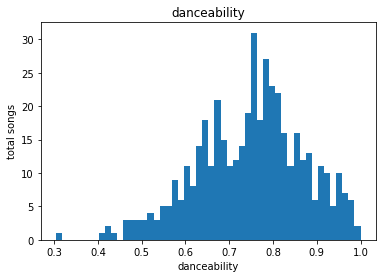

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


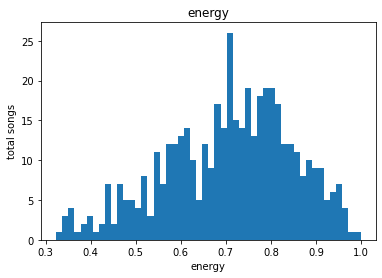

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


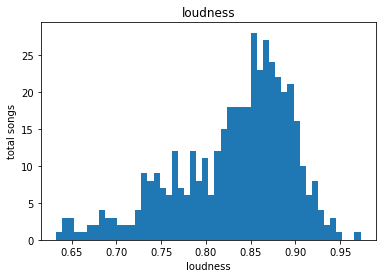

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


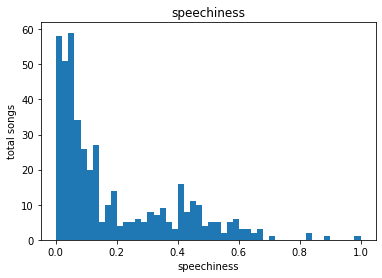

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


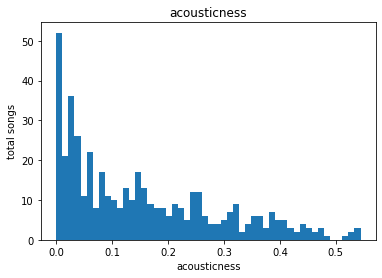

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


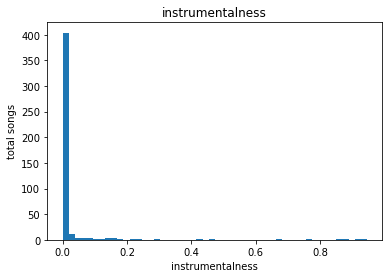

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


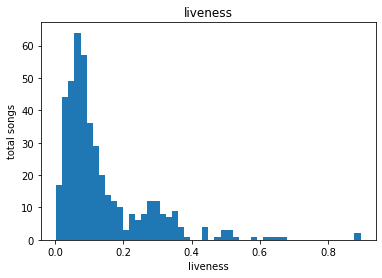

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


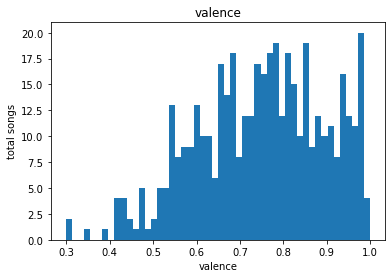

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


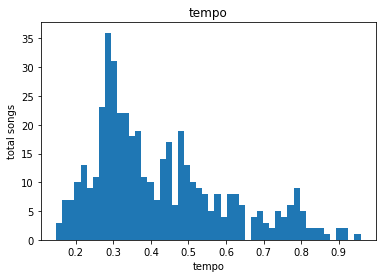

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [674]:
# histogram for every property to check value distribution
current_cluster = 2
for item in data.columns[0:-1]:
    y = data[data['cluster']==current_cluster][item]
    plt.xlabel(item)
    plt.ylabel("total songs")
    plt.title(item)
    plt.hist(y, bins = 50)
    plt.show()
    print(dm.description(item))

### Cluster 3

In [678]:
dm.get_random_song_cluster(df = data,
                        cluster = 3,
                        num_songs = 10)

[('Love Is Strange', 'Mickey & Sylvia'),
 ('Roll Over Beethoven', 'Chuck Berry'),
 ('Mercy, Mercy, Mercy', 'Cannonball Adderley'),
 ('Wonderful Tonight', 'Eric Clapton'),
 ('Tutti Frutti', 'Little Richard'),
 ('Wild One', 'Jerry Lee Lewis'),
 ("Don't It Make My Brown Eyes Blue", 'Crystal Gayle'),
 ('A Teenager In Love', 'Dion & The Belmonts'),
 ('All of You', 'Miles Davis'),
 ('Just A Gigolo - Remastered', 'Louis Prima')]

In [679]:
# top 10 closest songs to centroid
current_cluster = 3
songs_cluster = data[data['cluster'] == current_cluster]
columns = songs_cluster.columns[0:-1]
distances_centroid = dm.distance_to_centroid(songs_cluster[columns],centroids[current_cluster])
song_dist = pd.DataFrame({'distances_centroid':distances_centroid}, index=songs_cluster.index)
song_dist.sort_values(by='distances_centroid',ascending=True).head(10)

,,distances_centroid
name,artist,
I'm Gonna Get Married,Lloyd Price,0.143133
Two Not One,Lee Konitz,0.143578
Love For Sale,Anita O'Day,0.160438
Venus - Bonus Track,Frankie Avalon,0.179108
Here You Come Again,Dolly Parton,0.200786
Just A Gigolo - Remastered,Louis Prima,0.216124
Blues Inn - Remastered,Jackie McLean,0.216222
Beyond the Sea,Bobby Darin,0.221359
Cheek To Cheek,Ella Fitzgerald,0.232356


In [680]:
song_dist.sort_values(by='distances_centroid',ascending=False).head(10)

,,distances_centroid
name,artist,
Stalag 17,Ansel Collins,0.937744
"Mercy, Mercy, Mercy",Cannonball Adderley,0.902382
Every Hour,Kanye West,0.894548
Reggae Merengue,Tommy McCook,0.891047
"Shout, Pts. 1 & 2",The Isley Brothers,0.886736
Hound Dog,Elvis Presley,0.773820
Diana,Paul Anka,0.745986
Ready Teddy,Little Richard,0.745571
Joy Spring,Clifford Brown,0.743021


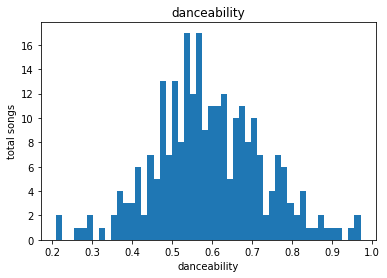

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


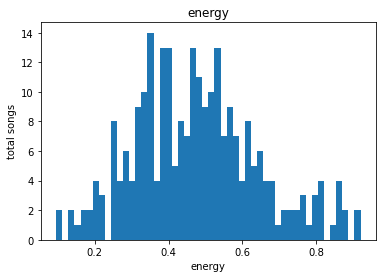

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


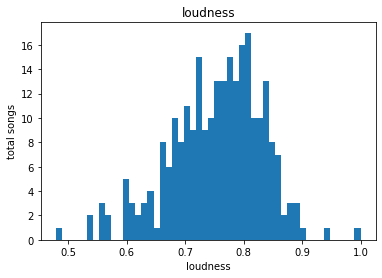

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


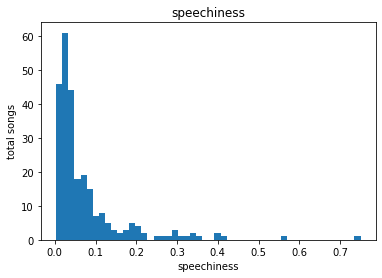

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


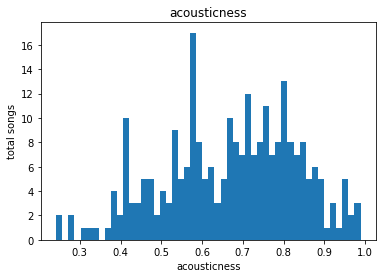

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


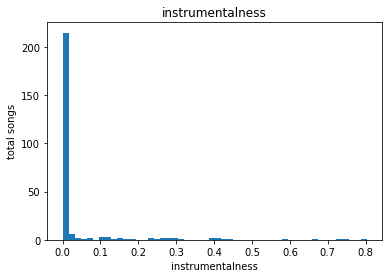

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


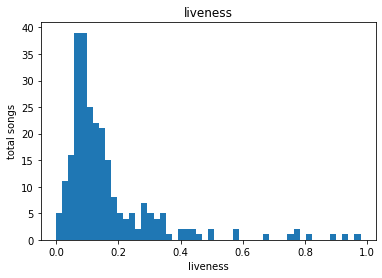

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


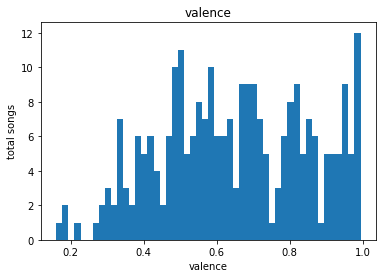

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


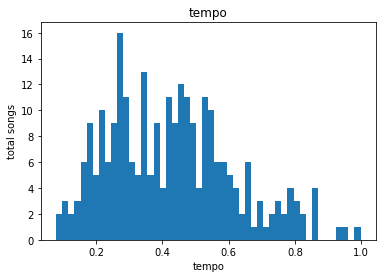

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [681]:
# histogram for every property to check value distribution
current_cluster = 3
for item in data.columns[0:-1]:
    y = data[data['cluster']==current_cluster][item]
    plt.xlabel(item)
    plt.ylabel("total songs")
    plt.title(item)
    plt.hist(y, bins = 50)
    plt.show()
    print(dm.description(item))

### Cluster 4

In [682]:
dm.get_random_song_cluster(df = data,
                        cluster = 4,
                        num_songs = 10)

[('Bizet: Carmen, Act 1: "L\'amour est un oiseau rebelle" (Carmen, Chorus) [Habanera]',
  'Georges Bizet'),
 ('My Funny Valentine - Remastered', 'Frank Sinatra'),
 ('Earth Angel (Will You Be Mine)', 'The Penguins'),
 ("You Don't Know What Love Is", "Anita O'Day"),
 ('Tennessee Waltz', 'Patti Page'),
 ('Say It (Over And Over Again)', 'John Coltrane Quartet'),
 ('Unforgettable', 'Nat King Cole'),
 ('Twilight Time', 'The Platters'),
 ("Annie's Song", 'John Denver'),
 ('All I Ask', 'Adele')]

In [683]:
# top 10 closest songs to centroid
current_cluster = 4
songs_cluster = data[data['cluster'] == current_cluster]
columns = songs_cluster.columns[0:-1]
distances_centroid = dm.distance_to_centroid(songs_cluster[columns],centroids[current_cluster])
song_dist = pd.DataFrame({'distances_centroid':distances_centroid}, index=songs_cluster.index)
song_dist.sort_values(by='distances_centroid',ascending=True).head(10)

,,distances_centroid
name,artist,
Mr. Blue,The Fleetwoods,0.140276
"Love Me Tender - From the 20th Century-Fox CinemaScope Production, ""Love Me Tender""",Elvis Presley,0.194139
Solitude,Billie Holiday,0.197428
Gruppen für drei Orchester - Werk Nr. 6,Karlheinz Stockhausen,0.198395
Péchés de vieillesse / Vol. III: Tirana pour deux voix (Les amants de Séville),Gioachino Rossini,0.200187
You Don't Know What Love Is,Anita O'Day,0.201485
My Funny Valentine - Remastered,Frank Sinatra,0.202028
"Bizet: Carmen, Act 1: ""L'amour est un oiseau rebelle"" (Carmen, Chorus) [Habanera]",Georges Bizet,0.205603
This Is Always,Betty Carter,0.206596


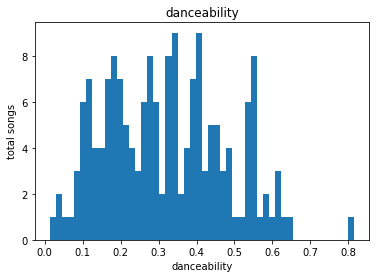

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


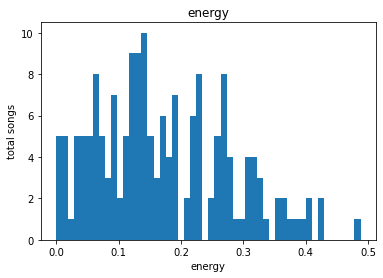

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


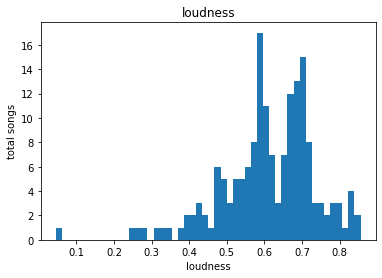

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


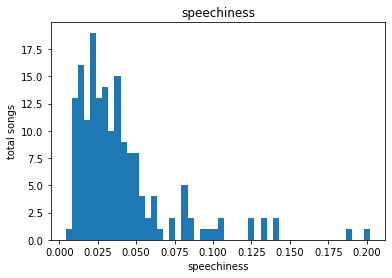

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


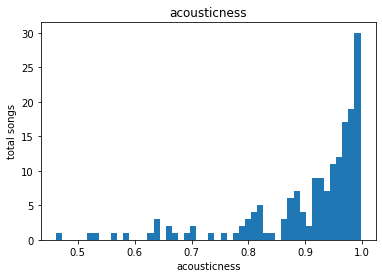

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


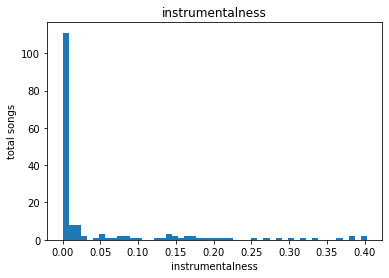

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


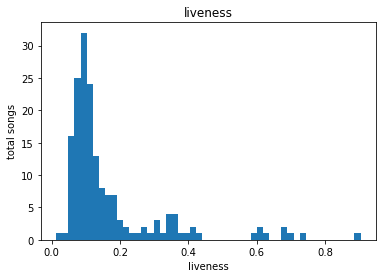

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


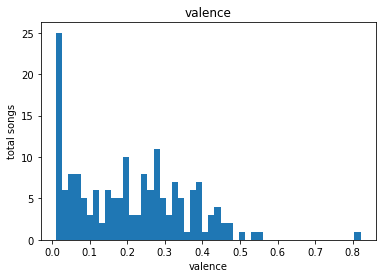

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


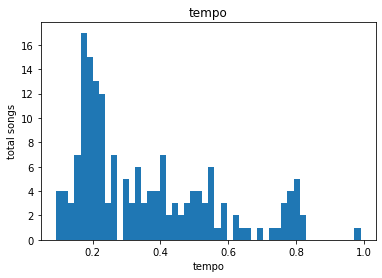

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


In [684]:
# histogram for every property to check value distribution
current_cluster = 4
for item in data.columns[0:-1]:
    y = data[data['cluster']==current_cluster][item]
    plt.xlabel(item)
    plt.ylabel("total songs")
    plt.title(item)
    plt.hist(y, bins = 50)
    plt.show()
    print(dm.description(item))